In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np

In [2]:
# Colors

baseline_color = (26/255, 29/255, 26/255, 1)
kong_color= (25/255, 145/255, 89/255, 1)
kong_no_auth_color = (63/255, 222/255, 148/255, 1)
istio_color= (65/255, 85/255, 153/255, 1)

In [3]:
# Function to format the labels
def thousands_separator(x, pos):
    return '{:,.0f}'.format(x)  # This adds a comma as a thousand separator

In [4]:
# Mean Response Times in milliseconds
user_levels = np.array([1, 5, 10, 50, 100])

response_times_istio = np.array([4.13, 6.96, 14.28, 91.12, 182.06])
response_times_baseline = np.array([2.11, 4.03, 13.06, 87.05, 179.11])
response_times_kong = np.array([2.16, 4.06, 14.03, 119.47, 242.02])
response_times_kong_no_auth = np.array([2.15, 4.14, 13.47, 90.06, 183.55])

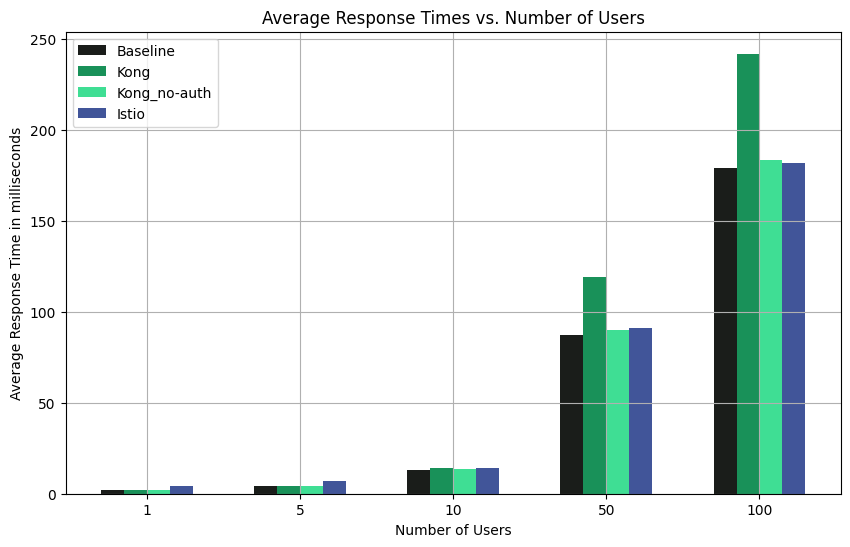

In [5]:
# Create a bar chart
plt.figure(figsize=(10, 6))
width = 0.15  # the width of the bars
x = np.arange(len(user_levels))  # the label locations

plt.bar(x - 1.0 * width, response_times_baseline, width, label='Baseline', align='center', color=baseline_color)
plt.bar(x - 0.0 * width, response_times_kong, width, label='Kong', align='center', color=kong_color)
plt.bar(x + 1.0 * width, response_times_kong_no_auth, width, label='Kong_no-auth', align='center', color=kong_no_auth_color)
plt.bar(x + 2.0 * width, response_times_istio, width, label='Istio', align='center', color=istio_color)

# Adding titles and labels
plt.title('Average Response Times vs. Number of Users')
plt.xlabel('Number of Users')
plt.ylabel('Average Response Time in milliseconds')
plt.xticks([p + width/2 for p in x], user_levels)
plt.legend()

# Display and save the plot
plt.grid(True)
plt.savefig("Average_response_times.png")
plt.show()

In [6]:
# Maximum Response Times in milliseconds
user_levels = np.array([1, 5, 10, 50, 100])

max_response_time_istio = np.array([80.00, 85.00, 123.00, 478.00, 1300.00])
max_response_time_baseline = np.array([63.00, 86.00, 153.00, 1305.00, 3273.00])
max_response_time_kong = np.array([68.00, 75.00, 176.00, 1892.00, 4293.00])
max_response_time_kong_no_auth = np.array([70.00, 91.00, 198.00, 810.00, 2691.00])

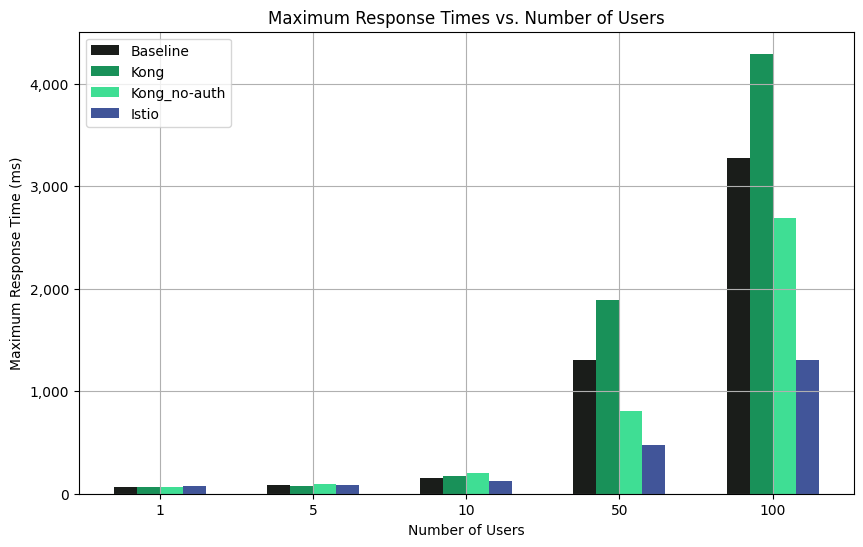

In [7]:
# Create a bar chart
plt.figure(figsize=(10, 6))
width = 0.15  # the width of the bars
x = np.arange(len(user_levels))  # the label locations

plt.bar(x - 1.0 * width, max_response_time_baseline, width, label='Baseline', align='center', color=baseline_color)
plt.bar(x - 0.0 * width, max_response_time_kong, width, label='Kong', align='center', color=kong_color)
plt.bar(x + 1.0 * width, max_response_time_kong_no_auth, width, label='Kong_no-auth', align='center', color=kong_no_auth_color)
plt.bar(x + 2.0 * width, max_response_time_istio, width, label='Istio', align='center', color=istio_color)


# Applying custom formatter to the y-axis
formatter = FuncFormatter(thousands_separator)
plt.gca().yaxis.set_major_formatter(formatter)

# Adding titles and labels
plt.title('Maximum Response Times vs. Number of Users')
plt.xlabel('Number of Users')
plt.ylabel('Maximum Response Time (ms)')
plt.xticks([p + width/2 for p in x], user_levels)
plt.legend()

# Display and save the plot
plt.grid(True)
plt.savefig("Maximum_response_times.png")
plt.show()

In [8]:
# Number of processed requests
user_levels = np.array([1, 5, 10, 50, 100])

samples_istio = np.array([143758, 411640, 400109, 312932, 313177])
samples_baseline = np.array([282124, 708455, 437570, 327614, 318355])
samples_kong = np.array([271061, 728829, 424729, 250184, 247256])
samples_kong_no_auth = np.array([276232, 715741, 443054, 332145, 326089])

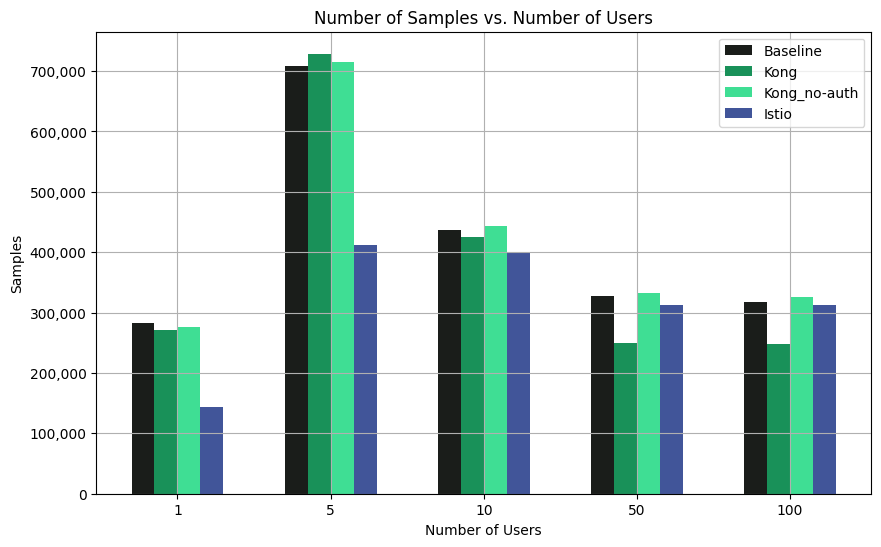

In [9]:
# Create a bar chart
plt.figure(figsize=(10, 6))
width = 0.15  # the width of the bars
x = np.arange(len(user_levels))  # the label locations

plt.bar(x - 1.0 * width, samples_baseline, width, label='Baseline', align='center', color=baseline_color)
plt.bar(x - 0.0 * width, samples_kong, width, label='Kong', align='center', color=kong_color)
plt.bar(x + 1.0 * width, samples_kong_no_auth, width, label='Kong_no-auth', align='center', color=kong_no_auth_color)
plt.bar(x + 2.0 * width, samples_istio, width, label='Istio', align='center', color=istio_color)

# Applying custom formatter to the y-axis
formatter = FuncFormatter(thousands_separator)
plt.gca().yaxis.set_major_formatter(formatter)

# Adding titles and labels
plt.title('Number of Samples vs. Number of Users')
plt.xlabel('Number of Users')
plt.ylabel('Samples')
plt.xticks([p + width/2 for p in x], user_levels)
plt.legend()

# Display the plot
plt.grid(True)
plt.savefig("Samples.png")
plt.show()

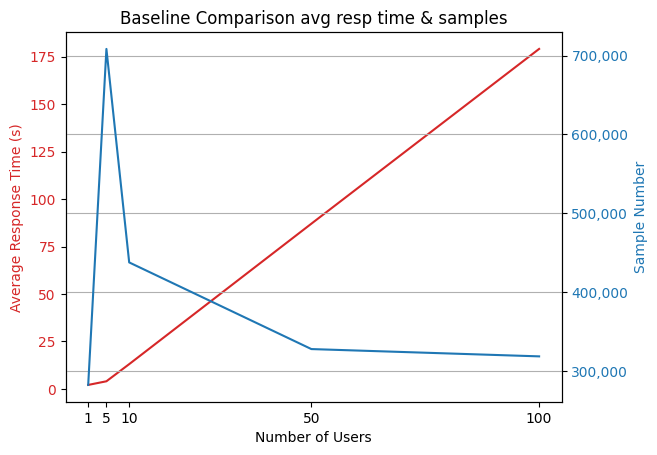

In [18]:
fig, ax1 = plt.subplots()

# Plotting the average response time on the primary y-axis
color = 'tab:red'
ax1.set_xlabel('Number of Users')
ax1.set_xticks(user_levels)
ax1.set_ylabel('Average Response Time (s)', color=color)
ax1.plot(user_levels, response_times_baseline, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Creating a second y-axis
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Sample Number', color=color)
ax2.plot(user_levels, samples_baseline, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Applying custom formatter to the y-axis
formatter = FuncFormatter(thousands_separator)
plt.gca().yaxis.set_major_formatter(formatter)

# Show the plot
plt.grid(True)
plt.title('Baseline Comparison avg resp time & samples')
plt.show()